In [1]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = datasets.california_housing.fetch_california_housing()

In [2]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [4]:
df_target = pd.DataFrame(data.target, columns = ["MedVal"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
X = df["AveRooms"]
y = df_target["MedVal"]
model = sm.OLS(y, X).fit()

In [9]:
predictions = model.predict(X)

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MedVal   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 4.411e+04
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:16:43   Log-Likelihood:                -35286.
No. Observations:               20640   AIC:                         7.057e+04
Df Residuals:                   20639   BIC:                         7.058e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AveRooms       0.3277      0.002    210.023      0.000       0.325       0.331
==============================================================================
Omnibus:                    21187.933   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12079513.755
Skew:                          -4.313   Prob(JB):                         0.00
Kurtosis:                     121.201   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

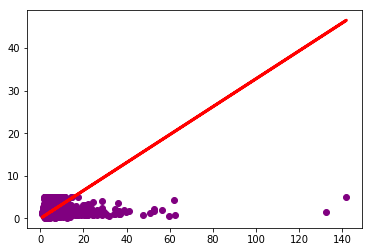

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='purple')
plt.plot(X, predictions, color='red', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()